# Treinamento Multilayer Perceptron

**Python:** 3.12.2

## Imports

In [32]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import dependencies as dep

In [33]:
PATH = '../data/data.csv'
PATH_OVERSAMPLED = '../data/data_balanced.csv'
MODEL_PATH = '../xgboost.pkl'

X = 1
O = -1
BLANK = 0

O_WIN   = 0
DRAW    = 1
ONGOING = 2
X_WIN   = 3
class_names = ['O_WIN', 'DRAW', 'ONGOING', 'X_WIN']

## Preparo dos Dados

In [34]:
df = pd.read_csv(PATH_OVERSAMPLED)

feature_cols = [str(i) for i in range(9)]
X = df[feature_cols]
y = df['category']

In [35]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Treinamento

In [36]:
# Criação e treino do modelo XGBoost
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',  # função de avaliação para múltiplas classes
    random_state=42
)
xgb.fit(X_train, y_train)

c:\Users\Bruno\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [37]:
# Avaliação no conjunto de validação
y_pred_val = xgb.predict(X_val)
print("Validation Accuracy :", accuracy_score(y_val, y_pred_val))
print("Validation Precision:", precision_score(y_val, y_pred_val, average='weighted'))
print("Validation Recall   :", recall_score(y_val, y_pred_val, average='weighted'))
print("Validation F1-score :", f1_score(y_val, y_pred_val, average='weighted'))

print("\nClassification Report (Validation):\n")

Validation Accuracy : 0.953125
Validation Precision: 0.9541174532229192
Validation Recall   : 0.953125
Validation F1-score : 0.9523368263299539

Classification Report (Validation):



## Teste

[INFO] Tempo de inferência: 0.0011 s

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

       O_WIN     0.9877    1.0000    0.9938        80
        DRAW     0.9756    1.0000    0.9877        80
     ONGOING     1.0000    0.9375    0.9677        80
       X_WIN     0.9756    1.0000    0.9877        80

    accuracy                         0.9844       320
   macro avg     0.9847    0.9844    0.9842       320
weighted avg     0.9847    0.9844    0.9842       320


 ========== CONFUSION MATRIX ==========


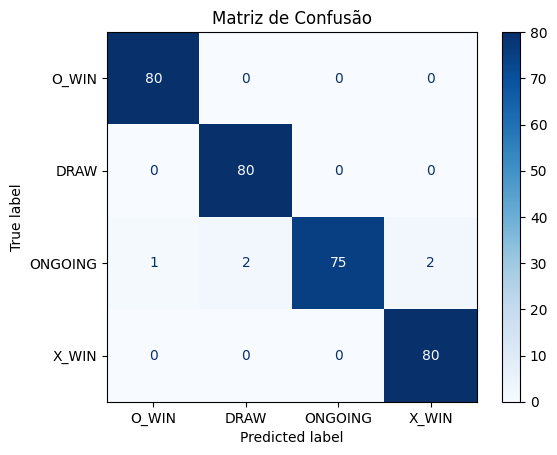


 ========== ROC CURVES (OVR) ==========


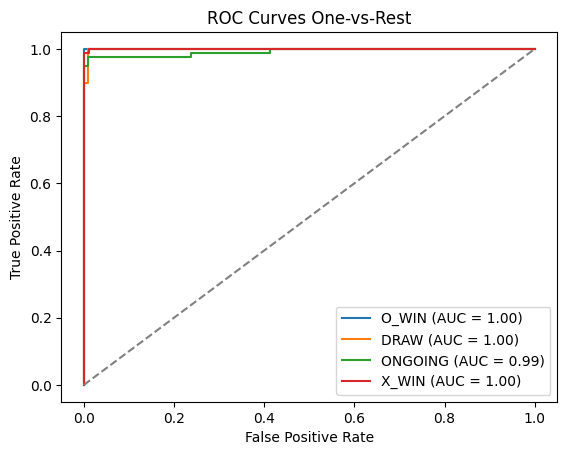


 ========== CALIBRATION CURVES ==========


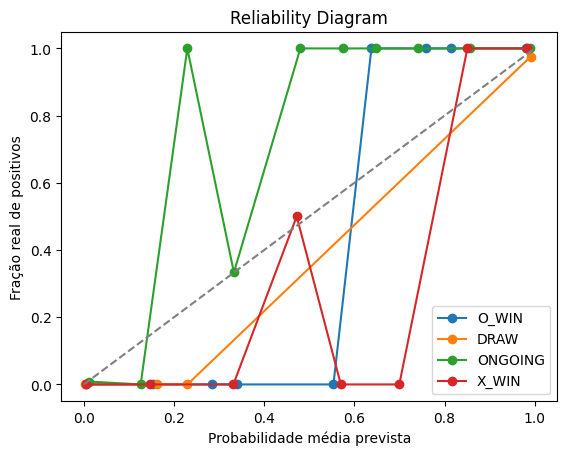

In [38]:
# Avaliação no conjunto de teste
y_pred_test = xgb.predict(X_test)
dep.test_model(xgb, X_test, y_test, class_names)

In [39]:
# Salvando o modelo
joblib.dump(xgb, MODEL_PATH)
print(f'Modelo salvo em {MODEL_PATH}')

Modelo salvo em ../xgboost.pkl
